In [3]:
import nltk
from nltk.corpus import movie_reviews
import tweepy                  #for accessing twitter API
from textblob import TextBlob  #processing textual data
from wordcloud import WordCloud  #frequency/importance of words in text data
import pandas as pds             #for working with relational data
import numpy as npy              #for arrays and matrices
import re                        #regular expressions
import matplotlib.pyplot as plt   #for plotting
plt.style.use('seaborn-talk');
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Importing excel file

In [10]:
from google.colab import files
uploaded=files.upload()

Saving avtweets.xlsx to avtweets.xlsx


Reading file

In [11]:
tweet_data = pds.read_excel('avtweets.xlsx')

Fetching column data of tweets

In [47]:
data = pds.DataFrame(tweet_data, columns=['text'])

In [48]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [49]:
data.head()

,text
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201..."
2,saving these bingo cards for tomorrow \n©\n #A...
3,RT @HelloBoon: Man these #AvengersEndgame ads ...
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta..."


In [64]:
#function to clean data
def clean(n):
  n= re.sub(r'@[a-zA-Z0-9_]+', '', n)# getting rid of @mentions
  n= re.sub(r'#', '', n)# getting rid of #
  n= re.sub(r':', '', n)# getting rid of #
  n= re.sub(r'RT[\s]+', '', n)# getting rid of retweets
  n= re.sub(r'https?:\/\/\S+', '', n)# getting rid of links
  return n

In [65]:
#cleaning
data['text']=data['text'].apply(clean)

In [66]:
data

,text,Subjectivity,Polarity,Analysis
0,literally nobody\nme\n\nAvengersEndgame,0.0000,0.000000,neutral
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackw...",0.8250,-0.390625,Negative
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000,neutral
3,Man these AvengersEndgame ads are everywhere,0.0000,0.000000,neutral
4,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral
...,...,...,...,...
14995,First time Last time ...,0.2000,0.125000,Positive
14996,The AvengersEndgame cast has seen a lot of ea...,0.3875,-0.262500,Negative
14997,kindly announce the approximate timings for i...,0.7500,0.100000,Positive
14998,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral


In [67]:
#method to check subjectivity
def sub(sub):
  return TextBlob(sub).sentiment.subjectivity
#method to check subjectivity
def pol(pol):
  return TextBlob(pol).sentiment.polarity
#create columns for subjectivity and polarity
data['Subjectivity']=data['text'].apply(sub)
data['Polarity']=data['text'].apply(pol)
#print dataframe
data

,text,Subjectivity,Polarity,Analysis
0,literally nobody\nme\n\nAvengersEndgame,0.0000,0.000000,neutral
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackw...",0.8250,-0.390625,Negative
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000,neutral
3,Man these AvengersEndgame ads are everywhere,0.0000,0.000000,neutral
4,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral
...,...,...,...,...
14995,First time Last time ...,0.2000,0.125000,Positive
14996,The AvengersEndgame cast has seen a lot of ea...,0.3875,-0.262500,Negative
14997,kindly announce the approximate timings for i...,0.7500,0.100000,Positive
14998,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral


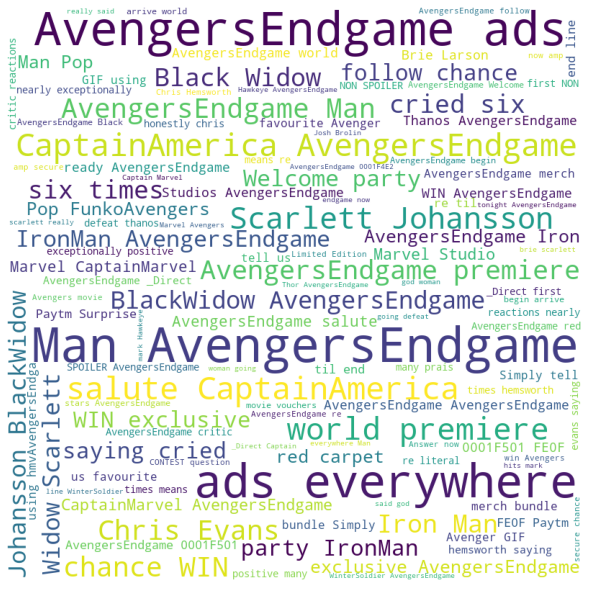

In [68]:
#word cloud
wc=' '.join([txt for txt in data['text']])
#stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, random_state=21,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wc)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [69]:
#positive,neutral and negative analysis
def analysis(dig):
  if dig>0:
    return 'Positive'
  elif dig==0:
    return 'neutral'
  else:
    return 'Negative'

#create new dataframe column to store analysis
data['Analysis']=data['Polarity'].apply(analysis)
#display dataframe
data

,text,Subjectivity,Polarity,Analysis
0,literally nobody\nme\n\nAvengersEndgame,0.0000,0.000000,neutral
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackw...",0.8250,-0.390625,Negative
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000,neutral
3,Man these AvengersEndgame ads are everywhere,0.0000,0.000000,neutral
4,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral
...,...,...,...,...
14995,First time Last time ...,0.2000,0.125000,Positive
14996,The AvengersEndgame cast has seen a lot of ea...,0.3875,-0.262500,Negative
14997,kindly announce the approximate timings for i...,0.7500,0.100000,Positive
14998,"We salute you, ! CaptainAmerica AvengersEndgame",0.0000,0.000000,neutral


In [79]:
#string to show positive tweets
i=1
sort=data.sort_values(by=['Polarity'])
for j in range(0,sort.shape[0]):
  if (sort['Analysis'][j]=='Positive'):
    print(str(i)+') '+sort['text'][j])
    print()
    i+=1

Streaming output truncated to the last 5000 lines.

3819)  Man AvengersEndgame kicked my ass. It was an epic conclusion to 11 years of films. It had laughs, incredible action a…

3820)  Man AvengersEndgame kicked my ass. It was an epic conclusion to 11 years of films. It had laughs, incredible action a…

3821) _NewEra Economic Collapse is Happening Now..

.
UFO ufos aliens socialmedia marketing YellowVests …

3822)  AvengersEndgame is EPIC EMOTIONAL AND THE BIGGEST BLOCKBUSER FROM MARVEL
You guys dont even know what you are in for
It…

3823) _Direct The first NON-SPOILER AvengersEndgame critic reactions are here and nearly all are exceptionally positive, with many prais…

3824) _Direct An IronMan / RocketRaccoon meet-up occurred on the AvengersEndgame premiere purple carpet... 

3825) _Direct In exactly one hour, the AvengersEndgame social media embargo lifts and we'll see the first reactions to the film... Only…

3826)  Higher, further, faster.  makes a Marvel-ous entrance on the Aven

In [80]:
from nltk.util import pad_sequence
#string to show negative tweets
p=1
sortdec=data.sort_values(by=['Polarity'],ascending='False')
for t in range(0,sortdec.shape[0]):
  if (sortdec['Analysis'][t]=='Negative'):
    print(str(p)+') '+sortdec['text'][t])
    print()
    p+=1

1)  i’m emotional, sorry!!

2014 x 2019
blackwidow
captainamerica 

2)  Boy... These two fuckers will beat the holy shit outta ours feelings this next helluva weekend.

AvengersEndgame 
GameOfThr…

3)  Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame 

4)  Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame 

5)  The debacle of Kalank is definitely going to have a positive impact for AvengersEndgame ... as audiences shy away and aw…

6)  Just a little live entertainment with ... AvengersEndgame 

7)  Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame 

8)  Endgame is here! LA world premiere is in just a few hours AvengersEndgame _Brothers 

9)  Just a little live entertainment with ... AvengersEndgame 

10)  Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame 

11) AvengersEndgame mini reviews coming in <U+0001F525><U+0001F525><U+0001F525>. Be careful out there everyone!

12)  Black Widow herself, Scarlett Johansson. B

<function matplotlib.pyplot.show>

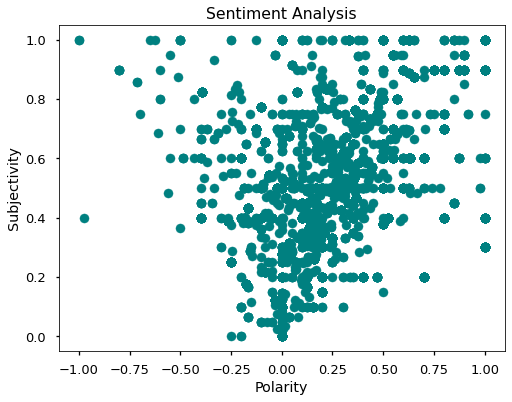

In [81]:
#plot polarity and subjectivite
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='teal')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [82]:
#positive tweet percentage
post=data[data.Analysis=='Positive']
post=post['text']
round(post.shape[0]/data.shape[0]*100,2)

38.21

In [84]:
#negative tweet percentage
negt=data[data.Analysis=='Negative']
negt=negt['text']
round(negt.shape[0]/data.shape[0]*100,2)

7.53

In [85]:
#neutral tweet percentage
newt=data[data.Analysis=='neutral']
newt=newt['text']
round(newt.shape[0]/data.shape[0]*100,2)

54.26

<function matplotlib.pyplot.show>

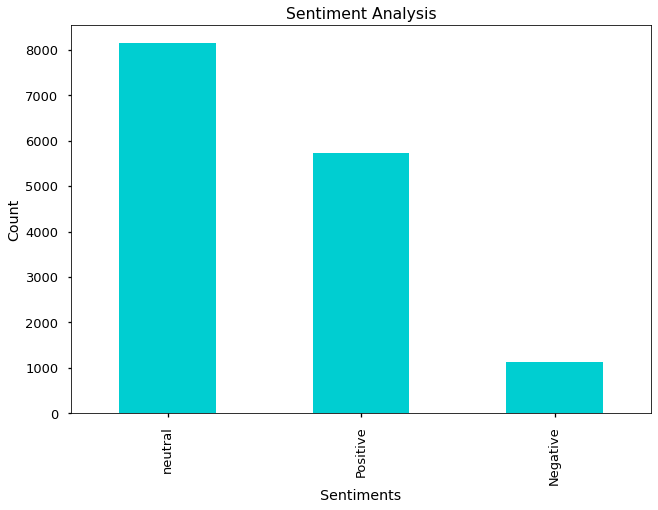

In [91]:
#show counts
data['Analysis'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
data['Analysis'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show